# SuperMarioBot: Using Deep Q-Learning to Play Super Mario Bros. (Columbia University MA Stats GR5242: Advanced Machine Learning Final Project Report)

## Contributors

* Sam Kolins (sk3651)
* Atishay Sehgal (as5453)
* Arpita Shah (as5451)

## Introduction

In 2013, researchers at Google DeepMind published the now-infamous paper **[Playing Atari with Deep Reinforcement Learning](https://arxiv.org/pdf/1312.5602.pdf)**, in which for the first time, a neural network algorithm learned how to play a video game in a fairly organic sort of way by playing against itself and training on the images produced from those play sessions. Since then, in just five short years, a whole host of enthusiastic data scientists have trained neural networks on a wide variety of different games. Most of these games have been Atari games, but for our project, we wanted to try something a bit more complicated: ***[Super Mario Bros. for the Nintendo Entertainment System (NES)](https://en.wikipedia.org/wiki/Super_Mario_Bros.)***. We are attempting here to train a deep Q-learning algorithm to play *Super Mario Bros.*; in particular, this means we want to get Mario to the end of the level before time runs out and without dying.

## How to Play *Super Mario Bros.*

### Objective and Level Design

The goal of the game, as mentioned previously, is to get to the end of the level. This is not as easy as it sounds; along the way, Mario must overcome many obstacles in the form of moving enemies that can hurt Mario and bottomless pits that will instantly kill him if he falls into them. Mario also only starts with three lives; if Mario still has lives remaining, he can restart from the beginning of the current level, but **if he runs out of lives, he gets a *Game Over*, and must restart from World 1-1** (although, there is a little-known trick whereby pressing **Start** and **A** to begin a new game will place Mario at the first level of whichever world he died on; so for example, if Mario gets a Game Over on World 4-3, he can restart on World 4-1 instead of World 1-1 using this trick). 

In particular, *Super Mario Bros.* is a side-scrolling platformer, meaning Mario will need to continue moving right in order to access the end of the level. The end of the level is represented by a flag; if Mario touches this flag, the level automatically ends, and a cutscene plays in which Mario enters a castle (if your level timer ends in 1, 3, or 6, a number of fireworks worth 500 points each equal to the last timer digit will fire off). There are eight worlds with four levels apiece, bringing the game's level count to 32; each level is denoted by World $X$-$Y$, where $X$ is the number of the world and $Y$ is the number of the level. There are five kinds of levels (each having their own musical theme in the original NES version of *Super Mario Bros.*):

* **Overworld**: these levels are the typical "default" platforming levels that take place outside atop solid ground. They do not tend to vary much in their terrain. The first level of each world is always an Overworld level; sometimes, the second or even third level of each world is an Overworld level as well.
* **Underground**: at the beginning of each of these levels, Mario travels down a *__Warp Pipe__* (generally used for transportation in the *Mario* games, but can also sometimes contain enemies) where he finds himself underground. These levels have a darker color theme and a ceiling of blocks above Mario at the top of the screen (and more blocks in general). Often times, the second level of each world will be an Underground level.
* **Underwater**: Mario starts the stage, and spends the entire stage, underwater. The physics of the entire level have completely changed as now Mario moves by swimming upward instead of jumping and falls much slower as a result. While Mario is not at any risk of drowning, there are unique swimming enemies in these levels that can still serve as potent threats due to their strange movement patterns (such as [Bloopers](https://i.etsystatic.com/9680903/r/il/26312a/620419040/il_570xN.620419040_rwuo.jpg)). Much like with Underground levels, the second level of each world is often Underwater (if it isn't Underground).
* **Athletic**: These levels typically have little to no true ground areas at all as Mario traverses on the tops of [large trees](https://www.mariowiki.com/images/d/dd/SMB1W1-3.png). They may also make use of moving platforms (see previous pic). This increased verticality and general increase in bottomless pits can make them treacherous to navigate. The third level in each world is almost always Athletic with the exception of World 8-3, the game's penultimate level, which takes place in the Overworld.
* **Castle**: In the last level of each world (so World $X$-$4$), Mario enters one of Bowser's castles (Bowser being the main villain of *Super Mario Bros.* and much of the *Mario* series in general). Much like the Underground levels, these levels are generally enclosed by a ceiling because they canonically take place indoors. Generally speaking, the most treacherous of obstacles will appear in these levels, many of which having a fire theme; bottomless pits are generally replaced by [lava pits](https://www.mariowiki.com/images/3/32/SMB1W1-4.png) (which can spit out their own fireballs called [Podoboos](https://vignette.wikia.nocookie.net/mario/images/4/48/Podoboo_1.jpg/revision/latest?cb=20120504221020) with little to no warning) and [Fire-Bars](https://www.mariowiki.com/images/3/3c/SMBW5-4.png) which can [spin around](https://www.mariowiki.com/images/7/74/FireRodSMB.gif) and hit the player are numerous. Bowser, standing on a bridge overlooking a lava pit, is directly blocking the end of the level (represented by an axe instead of a flag) and will spit fire traveling in straight lines at the player when he appears on-screen. If Mario touches this axe, the bridge disappears, Bowser falls into the pit, and Mario clears the level and the world, shortly followed by an [infamous cutscene](https://www.youtube.com/watch?v=n4ucO4xe28c).

After beating the NES version of the game, the player unlocks a **hard mode**. This makes many modifications to the game, like turning [Goombas](https://ctl.s6img.com/society6/img/vG1nc6QSu4HFMq-cU71ibAx76z4/w_700/prints/~artwork/s6-0020/a/7729279_15115587/~~/pixel-goomba-super-mario-bros-prints.jpg), the game's weakest and most standard enemies, into [Buzzy Beetles](http://farm1.static.flickr.com/59/194964545_e89f8ff3e7.jpg) which are immune to fireballs. All enemies move faster, power-ups are no longer available, all moving platformers are made smaller, and Fire-Bars are far more common. Levels in the base game that are similar to each other (e.g. World 1-3 and 5-3 are almost the same except 5-3 is harder) are now made identical, making a lot of easier levels harder.

### Controls

The [NES controller](https://pisces.bbystatic.com/image2/BestBuy_US/images/products/5579/5579396_sd.jpg;maxHeight=640;maxWidth=550) has eight buttons: the ***D-pad*** (containing the four cardinal directions **up**, **down**, **left**, and **right**), **A**, **B**, **Start**, and **Select**. The function of each button is generally intuitive, but depends on context:

* **Left** and **right** will move Mario left and right. The other two D-pad directions, **up** and **down**, are rarely used, but do have uses; **down** is used to access Warp Pipes and crouch as ***Super Mario*** (more on that later) while **up** is generally only used for traveling up vines.
* **A** is used to jump or swim upwards.
* **B** is used to run, throw a ***fireball*** (more on this later), restart the game at the end, or select a world.
* **Start** pauses the game and confirms the selected option on the title screen.
* **Select** is only used on the title screen to select the number of players; *Super Mario Bros.* was a multiplayer game on the NES where a second player could play as Mario's brother, Luigi. Control would alternate between the two players whenever any of them died.

### Items and Enemies

As mentioned before, each level has enemies that can hurt Mario if he touches them. Typically, the only way Mario can beat enemies is by jumping on them (although there are exceptions, like [Spinies](https://c1.staticflickr.com/1/67/194964203_92e02e0e72_m.jpg), which have spikes on their back that will hurt Mario if he touches them). Mario typically cannot survive a hit; that is, if an enemy touches him once (not counting Mario jumping on them), he dies and loses a life. However, Mario can collect an item known as a **[Super Mushroom](http://icons.iconarchive.com/icons/ph03nyx/super-mario/256/Retro-Mushroom-Super-icon.png)** (technically called a "Magic Mushroom" in the days of *Super Mario Bros.* and has since changed names) that will make him grow to twice his size. This allows Mario to break blocks above him (except the [? Block](https://res.cloudinary.com/teepublic/image/private/s--xm7dVDxa--/t_Preview/b_rgb:0195c3,c_limit,f_jpg,h_630,q_90,w_630/v1481855557/production/designs/955552_1.jpg), from which Mario can collect [coins](https://i.kinja-img.com/gawker-media/image/upload/s--dpkSgaoo--/c_fit,f_auto,fl_progressive,q_80,w_320/18j2qh36rzq56jpg.jpg) and items), crouch, and more importantly, take a hit without dying (although doing so will transform him back to his regular size). Mario can also collect a **[Fire Flower](http://icons.iconarchive.com/icons/ph03nyx/super-mario/256/Retro-Flower-Fire-icon.png)** which, in addition to granting Mario the effects of the Super Mushroom, also gives him the part to throw fireballs with **B** that can kill enemies (even Spinies). In this state, Mario has a distinct look - **Fire Mario** - in which his shirt turns red and his hat and overalls turn white. A comparison between all three standard versions of Mario can be found [here](https://i.imgur.com/q7FzrbE.png). Lastly, Mario can very rarely find a [Starman](http://rs997.pbsrc.com/albums/af99/Super_Mario_11/SMB1StarMan.gif~c200) inside a ? Block that grants him invincibility to any enemy he touches and also changes the music to this [catchy theme](https://www.youtube.com/watch?v=Lw049q22-hY) during the duration of its effect.

## OpenAI Gym and `gym-super-mario-bros`

The version of the game we are using for this project is not exactly the same as the NES version of Mario, however, as we do not have access to an authentic NES console. Instead, we are **using an NES emulator to run the game**, modified to run in Python (2.7, 3.5, or 3.6) and with some extra modifications for convenience. The package we are using, called **[`gym-super-mario-bros`](https://pypi.org/project/gym-super-mario-bros/)**, was created by Christian Kauten ("kautenja" on GitHub) and is an OpenAI Gym environment using the [`nes-py` emulator](https://pypi.org/project/gym-super-mario-bros/) (also made by Kauten) that can run both the original *Super Mario Bros.* and *Super Mario Bros. 2: The Lost Levels*. We are only concerned with *Super Mario Bros.* for this project.

There are many changes made to the game, like running at a far smaller resolution than the NES was capable of and the lack of music, but the most important changes are summarized here:

- Nearly all __cutscenes__ have been __removed from the game__. This includes Mario's death animation, the cutscenes that display the current level name and Mario's life count prior to the beginning of each level, the level clear cutscene (where Mario enters the castle just beyond the flag), the world clear cutscene, and so on. This is because the game cannot register inputs during these scenes and so there is no reason to have the neural network attempt to train on them. If a cutscene can't be removed by hacking the NES's RAM (as the environment attempts to do from `nes-py`), the program will lock any Python process attempting to train on the cutscene frames until the game is ready to accept inputs again.
- __Levels can be loaded individually.__ Rather than play from the very beginning of the first level, we can instead decide to train a network on any particular level of our choosing. This can be a good way to train Mario on trickier levels that may have more difficult terrain (like Athletic or Castle levels) or enemies that only appear in certain levels. Doing so however means that a single episode contains only one life rather than three lives.
- __There are multiple downsampled versions of the game.__ Downsampling is important because the reduction in rendering detail will make it easier for the convolutional layers of the deep Q-learning network to process the game images. There are three downsampled versions, in addition to `v0`, the original version of the game (see the `gym-super-mario-bros` documentation for more details):
    * `v1` does not affect any foreground elements, but removes color from the background and simplifies the designs of background elements somewhat.
    * `v2` further simplifies all in-game assets, including Mario and the in-game heads-up display (HUD), into blockier designs. **This is the render we are using for our project.**
    * `v3` takes this even further, simplifying all elements into colored rectangles (including Mario himself!).
- The base game contains **4 frames of frameskip**. This means that, though each frame is calculated, only every fourth frame is drawn when the game is rendered. **This frameskip can be removed**, but it is not recommended for CPU's/GPU's that are not fast enough to render the game quickly.

There are many more details about how the game tracks various statistics that we would like to optimize over (like Mario's x-position) or against (like the in-game clock). Please read the `gym-super-mario-bros` documentation for more details.

## Final Goal

There are many possible goals we can set for ourselves here. A very ambitious goal would be to train Mario to beat the entire game in a single episode... all 32 levels! We're going to be more realistic though, especially given our relative inexperience in Python and lack of time relative to the length of training times and say that a good goal would simply be to **beat World 1-1**. If not, we'd like to at least see how far we can get and offer possible improvements or reasons as to why we were unable to reach this goal.

## Additional Notes

This entire notebook was created *locally* in Python 3.6.6 because ***Colab has issues running `gym-super-mario-bros`*** (at least, for us; trying to load the Mario environment was giving us weird errors we were unable to diagnose). There it is ***strongly* recommended that you *do not attempt to run this in Google Colab***. Also, make sure that **Microsoft Visual C++ 14.0 is installed**, which can be acquired [here](https://www.scivision.co/python-windows-visual-c++-14-required/).

And now, without further ado, let the learning begin!

## Project Implementation: SuperMarioBot (5xConv AV-Stream Network)

### Installation

In [ ]:
# note: this entire notebook was created LOCALLY in Python 3.6.6 because Colab has issues running gym-super-mario-bros

# for me:
# to access, open Anaconda Prompt and type "activate py36" followed by "jupyter notebook"
# it might only need to be done once
# does not need to be done on the desktop because I made sure to install Anaconda3 5.2.0 which has Python 3.6 by default

# in console: "python -m pip install --upgrade pip" after "activate py36" to enter the Python 3.6 notebook
# start by installing the package
!pip install gym-super-mario-bros

When running the starter code, I had some missing DLL errors from trying to import `cv2` (which is a dependency used by either `nes_py` or `gym_super_mario_bros`), so installing the following package might help if you get the same issues. If not, I would recommend installing [Dependency Walker](http://dependencywalker.com/), which is free, which I ran on the `.pyd` file for my version of `cv2` to determine which dependencies I was missing and thereby manually downloaded them.

In [6]:
# I had some missing DLL errors from trying to import cv2, so installing this might help if you have the same issues
# if not, you might have to look for the missing DLL's manually. there's a free program called Dependency Walker that can help
# locate missing DLL's
!pip install opencv-contrib-python

In [35]:
# install Tensorboard if needed for visualization
!pip install Tensorboard

We mentioned earlier that the NES controller has eight buttons. Because any combination of inputs can be registered on a single frame, that means there are $2^8 = 256$ possible NES controller inputs possible on a given frame. But *Super Mario Bros.* fails to make use of most of them; as discussed earlier, the **Select** and **Start** buttons (and even **up** and **down**) are highly niche buttons within the game, and because this emulation lacks a title screen (as there is no reason to train on it), we never need to press **Start** or **Select**. This seems like it would an extremely wasteful use of this action space, but luckily, `gym_super_mario_bros` contains three action libraries. One of these is `SIMPLE_MOVEMENT`, which contains the following seven inputs: **idle**, **right**, **right+A**, **right+B**, **right+A+B**, **A**, and **left**. `COMPLEX_MOVEMENT` adds button combinations that involve the direction **left** while `RIGHT_ONLY` removes any non-idle action that does not move Mario to the right.

Why might Mario ever want to move left? He may want to dodge enemies or go back to get missed coins or power-ups, but there is a more pertinent use case here. Mario may be forced to enter a pipe that opens sideways, in which case if it is possible to jump on that pipe and keep moving forward past the opening like it is at [the end of World 1-2](https://www.mariowiki.com/images/f/fb/World_1-2_SMB.png), Mario is very likely to get stuck running into the wall unless he learns to move left.

In [1]:
# packages needed for the rest of the project, except for gym_super_mario_bros stuff (in the next code block)
# if you get a FutureWarning message about "np.floating" being deprecated or something, ignore it

from __future__ import division
from keras.models import Model
from keras.layers import Conv2D, Dense, Flatten, Input, Lambda
from keras.callbacks import TensorBoard
import keras.backend as K

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# run this to allow Keras to save model weights
# it should just run automatically because h5py is a dependency of Keras by default
import h5py
import os # also need this to create the path

C:\Users\Sam\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# run this block if you just want to import without seeing the demo of Mario doing random stuff for 5000 steps
# if you haven't seen that yet, you should!
from nes_py.wrappers import BinarySpaceToDiscreteSpaceEnv
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
# run this for the RIGHT_ONLY Mario training periods (see Training Period 6 near the end of the report)
from gym_super_mario_bros.actions import RIGHT_ONLY

In [12]:
# initializing an environment in which Mario chooses a random action from the SIMPLE_MOVEMENT action library for 5000 steps
# on the default Mario ROM's, there is a frameskip factor of 4 frames, so one step is really more like 4 frames

from nes_py.wrappers import BinarySpaceToDiscreteSpaceEnv
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
env = gym_super_mario_bros.make('SuperMarioBros-v2')
env = BinarySpaceToDiscreteSpaceEnv(env, SIMPLE_MOVEMENT)

done = True
for step in range(5000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()

env.close()

Whether you try to run the demo or not, there's one important takeaway: when acting completely randomly, Mario has a hard time clearing [this pipe section](https://i.imgur.com/J4SHXL6.png) near the beginning of the level, because Mario either fails to randomly succeed in jumping over the pipes before the time limit is reached or he touches a Goomba and dies. This is the first serious challenge a random algorithm has when facing World 1-1 and it is the first challenge that we would like to learn to surpass using a deep $Q$-learning network.

### Building the Network

Now, we assemble the network architecture as an object instance of the class `CNN_DQNAgent`. The first half is a collection of five convolutional network layers; the second half is, for lack of a better term, going to be called the ***AV-stream***. This splits the output of the final convolutional layer into a *value stream* and an *advantage stream*. The former represents how well off Mario is in his current state; the latter represents how much better off Mario can be by taking a particular action. Advantage is essentially the difference between the Q function and the value stream. To get the estimated Q output, we must add back the advantage and value streams together; the highest advantage would then, of course, yield the highest Q output and therefore represent our optimal action for the current state.

The basis of this network design was drawn from [Branko Blagojevic's great tutorial](https://medium.com/ml-everything/learning-from-pixels-and-deep-q-networks-with-keras-20c5f3a78a0) on reinforcement learning with CNN's and Keras.

In [4]:
# we can start to actually implement the deep Q-network (DQN) now

class CNN_DQNAgent():
    def __init__(self, input_shape, num_actions, final_layer_size = 128):
        # The input image of Super Mario Bros. is 256x240x3 (RGB color channels)
        # but env.observation_space.shape = (240, 256, 3), so for whatever reason it's flipping the images
        # either that or I'm somehow wrong about the dimension conventions for gym_super_mario_bros/nes_py
        # we will have to account for this in our model
        self.inputs = Input(shape = input_shape, name = "main_input")
        
        # 5 convolutional layers (with relu activation) on the input
        # Conv1: 32 filters, 24x24 with 4x4 striding
        self.model = Conv2D(filters = 32, kernel_size = [24, 24], strides = [4, 4], 
                            activation = "relu", padding = "valid", name = "conv1")(self.inputs)
        # Conv2: 64 filters, 13x17 with 2x2 striding
        # the rectangular filters here are designed to make the output square (not counting depth of course)
        self.model = Conv2D(filters = 64, kernel_size = [13, 17], strides = [2, 2], 
                            activation = "relu", padding = "valid", name = "conv2")(self.model)
        # Conv3: 64 filters, 12x12 no striding (1x1)
        self.model = Conv2D(filters = 64, kernel_size = [12, 12], strides = [1, 1], 
                            activation = "relu", padding = "valid", name = "conv3")(self.model)
        # Conv4: 128 filters, 8x8 no striding
        self.model = Conv2D(filters = 128, kernel_size = [8, 8], strides = [1, 1], 
                            activation = "relu", padding = "valid", name = "conv4")(self.model)
        # Conv5: 128 (final_layer_size) filters, 4x4 no striding
        self.model = Conv2D(filters = final_layer_size, kernel_size = [4, 4], strides = [1, 1], 
                            activation = "relu", padding = "valid", name = "conv5")(self.model)
        # output size is now 1x1x128 with 1,884,576 trainable parameters
        
        # the final conv layer is separated into value and advantage streams
        # value stream: current value in a given state
        # advantage stream: change in value after making a particular move
        # Advantage(state, action) = Q(state, action) - Value(state)
        self.stream_AC = Lambda(lambda layer: layer[:, :, :, :final_layer_size // 2], 
                                name = "adv_stream")(self.model)
        self.stream_VC = Lambda(lambda layer: layer[:, :, :, final_layer_size // 2:], 
                                name = "val_stream")(self.model)
        
        # flatten the advantage and value functions
        self.stream_AC = Flatten(name = "adv_flat")(self.stream_AC)
        self.stream_VC = Flatten(name = "val_flat")(self.stream_VC)
        
        # define weights for advantage and value layers
        # these will be trained so that the matmul matches the expected adv/val from play
        self.Advantage = Dense(num_actions, name = "final_advantage")(self.stream_AC)
        self.Value = Dense(1, name = "final_value")(self.stream_VC)
        
        # add value and advantage to get Q-output
        # advantage is evaluated based on how good the action is relative to average state adv
        self.model = Lambda(lambda val_adv: val_adv[0] + (val_adv[1] - K.mean(val_adv[1], axis = 1, keepdims = True)),
                           name = "final_out")([self.Value, self.Advantage])
        self.model = Model(self.inputs, self.model)
        self.model.compile("adam", "mse")
        self.model.optimizer.lr = 0.0001 # learning rate

Below is a snippet from an Excel document in which I have listed out each layer of the network and calculated the number of parameters it adds to the total number of trainable parameters (provided we have used `SIMPLE_MOVEMENT` as our action library). In the end, we have $\approx 1.88\mathrm{M}$ trainable parameters.

![x](https://i.imgur.com/SFV5rET.png)

We can now proceed to create the agent instances that contain our models (this does not need to happen with explicit variable initialization or any mention of a `tf.Session()` object at all because we are using Keras and not TensorFlow). The main network will be saved to `main_qn` while the target network will be saved to `target_qn`. The significance of the target network will be explained later. For now, we just worry about creating them.

In [5]:
# Q-network setup
main_qn = CNN_DQNAgent(input_shape = (240, 256, 3), num_actions = len(RIGHT_ONLY), final_layer_size = 128)
target_qn = CNN_DQNAgent(input_shape = (240, 256, 3), num_actions = len(RIGHT_ONLY), final_layer_size = 128)
# len(SIMPLE_MOVEMENT) = 7
# len(RIGHT_ONLY) = 5
# len(COMPLEX_MOVEMENT) = 12

# running a summary call to confirm my parameter calculations are correct
main_qn.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 240, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 55, 59, 32)   55328       main_input[0][0]                 
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 22, 22, 64)   452672      conv1[0][0]                      
__________________________________________________________________________________________________
conv3 (Conv2D)                  (None, 11, 11, 64)   589888      conv2[0][0]                      
__________________________________________________________________________________________________
conv4 (Con

### Experience Replay Buffer, Parameters, Helper Function

Now, we wish to implement an ***experience replay system*** that stores game experiences. This too is represented as an instance of a class, this time called `ExperienceReplay`. To train from the network, we sample a batch of these from the trove of game experiences we have collected. We also cycle out older experiences for newer, more relevant ones past a certain limit defined here by `buffer_size`. Again, Blagojevic's tutorial was very helpful here.

In [6]:
class ExperienceReplay:
    def __init__(self, buffer_size = 50000):
        """ Data structure used to hold experiences """
        # each element of buffer contains a list: [state, action, reward, next_state, done]
        self.buffer = []
        self.buffer_size = buffer_size
        
    def add(self, experience):
        """ Adds list of experiences to the buffer """
        # extend stored experiences
        self.buffer.extend(experience)
        # keep last buffer_size number of experiences
        self.buffer = self.buffer[-self.buffer_size:]
        # this construction better than using a control statement on current length of buffer
        
    def sample(self, size):
        """ Returns a sample of experiences from the buffer """
        sample_idxs = np.random.randint(len(self.buffer), size = size)
        sample_output = [self.buffer[idx] for idx in sample_idxs]
        sample_output = np.reshape(sample_output, (size, -1))
        return sample_output

As mentioned, we occasionally pull from `ExperienceReplay` to train the network. We then continue playing using the updated network after the weights have been changed. The **target network** is used to determine what the values should be based on the current state and action. In the next section, we will actually implement how training the main model is supposed to work, but first, we must initialize a host of useful parameters that will be used for training. Each line is commented with a brief description of what each variable represents.

In [7]:
# initializing useful parameters
batch_size = 256 # number of experiences used for each training step
num_epochs = 20 # number of epochs to train
update_freq = 8 # frequency of network updates
y = 0.99 # discount factor
prob_random_start = 0.9 # initial epsilon (chance of random action in epsilon-greedy policy)
prob_random_end = 0.3 # final epsilon
epsilon_steps = 312 # number of times epsilon decays from init -> final (should be = # of training episodes)
num_episodes = 320 # number of episodes to train; remember that one episode = 3 lives!
pre_train_episodes = 8 # number of episodes of random action (to build replay buffer)
max_num_step = 50000 # maximum episode length in units of steps
load_model = True # if True, will load a saved model
path = "./models" # path for saved model
main_weights_file = path + "/main_weights.h5" # file that will contain saved main weights
target_weights_file = path + "/target_weights.h5" # same, but for target weights
final_layer_size = 128 # size of final conv layer (before AV-stream split)
tau = 1 # rate to update target network toward primary network

# note: num_episodes - pre_train_episodes is number of training episodes

# if we wish to stop training after surpassing a certain mean reward, specify that goal here
# I'm leaving this commented out (and the print segment for surpassing the goal as well)
# because I don't yet have a sense of how much reward corresponds to, say, beating a level yet
# presumably, we could also read from the info dict returned by each step to detect for changes in level tuple
# goal = 10

Some useful notes:

* Remember that a single episode consists of three lives. Since we aren't accounting for changes in behavior based on the number of lives as that is not a part of the reward function (to be discussed later), our strategy is independent of the current life count, and so one-life episodes would be indistinguishable from three-life episodes. We haven't adjusted the *Super Mario Bros.* package to reflect this difference (although we could choose to load a single level if we wanted one-life episodes), but it does mean we can run on fewer episodes and still get good results. Choosing $333$ episodes, for example, as I have done here by default, still gets us $333 \times 3 = 999$ lives worth of training.
* This algorithm uses an $\epsilon$-greedy policy, but introduces an interesting variation in which $\epsilon$ will vary over time. Mario will therefore be fairly experimental in the earliest stages of the stage, trying a host of different options to collect as many game states as possible (to say nothing of the pre-training episodes in which Mario will only act randomly), but will be increasingly looking to optimize his reward over time.
* We want `max_num_step` to be very large. As you might have seen running a completely random sample of Mario actions a few code blocks ago, $5000$ steps is enough for an episode or two, but that's about it. Once Mario gets better at running through levels, each episode could be very long; we don't want to cut off too many potentially successful level completion runs early.
* The inclusion of `final_layer_size` is technically unnecessary as we have given it the default value of `128` when we were defining our network agent. Because it is important in determining the sizes of our advantage and value streams though, it feels like something that should technically be modifiable via changing a variable.

There is one more thing we need before we can start the actual training: a helper function called `update_target_graph`. This function updates the target graph `target_graph` with values from the main graph `main_graph` via a weighted average of the values in each graph. The weight for this average is determined by `tau`. For an example of how this might work, suppose `main_graph = [0, 1, 2]`, `target_graph = [3, 4, 5]`, and $\tau = 0.1$. Then the values updated to the target graph, written in matrix multiplication form, are

$$ \left[\begin{matrix}
0 & 3 \\
1 & 4 \\
2 & 5 \end{matrix}\right] \cdot \left[\begin{matrix}
\tau \\
1 - \tau \end{matrix}\right] = \left[\begin{matrix}
0 & 3 \\
1 & 4 \\
2 & 5 \end{matrix}\right] \cdot \left[\begin{matrix}
0.1 \\
0.9 \end{matrix}\right] = \left[\begin{matrix}
2.7 \\
3.7 \\
4.7 \end{matrix}\right]. $$

The function is not actually doing this as a matrix multiplication though, rather it is simply taking a weighted average for each entry, as in `[(0 * 0.1) + (3 * 0.9), (1 * 0.1) + (4 * 0.9), (2 * 0.1) + (5 * 0.9)] = [2.7, 3.7, 4.7]`. Note that we do not need to store these weights in any sort of variable; a simple call to `set_weights()` will calibrate them for us. Because we are not using TensorFlow, we do not need to save these into a tensor object and then make sure the session runs on this tensor object in addition to the rest of the graph. This is a nice convenience that the use of Keras grants to us.

The code for this won't be found on Blagojevic's tutorial. Instead, it can be found [on his GitHub here](https://github.com/breeko/Simple-Reinforcement-Learning-with-Tensorflow/blob/master/Part%204%20-%20Deep%20Q-Networks%20and%20Beyond%20with%20Keras.ipynb).

In [8]:
# helper function for updating target graph with values from main graph
def update_target_graph(main_graph, target_graph, tau):
    updated_weights = (np.array(main_graph.get_weights()) * tau) + (np.array(target_graph.get_weights()) * (1 - tau))
    target_graph.set_weights(updated_weights)

Now, we can actually start training. The basis for this code can also be found on Blagojevic's GitHub (see above), but because we're training on *Super Mario Bros.* and not Blagojevic's peculiar custom game (which, funnily enough, is from a package called `gridworld`, even though it's not the GridWorld game from class), we needed to make a number of critical changes. For example, the tutorial makes no use of Tensorboard whatsoever, so it took some effort to figure out to display the statistics I wanted to display using Keras. I also needed to learn how to access variables and functions specific to `gym_super_mario_bros`, such as the reward function, because it's not as simple as it is in Blagojevic's custom `gridworld` game. In fact, perhaps we will take a minute to briefly explain it...

### The Reward Function

The documentation for `gym_super_mario_bros` defines the reward per step $r$ as

$$ r = v + c + d $$

where:

* $v$ is Mario's **instantaneous velocity**. More precisely, it is the difference in the agent's $x$-position between states. Therefore, if $x_0$ is Mario's initial position and $x_1$ is Mario's position after advancing a step, then $v = x_1 - x_0$. As a consequence, $v > 0$ implies Mario is moving right, $v < 0$ implies Mario is moving left, and $v = 0$ implies Mario has not moved at all (at least not horizontally; perhaps he is jumping/falling in place or climbing a vine).
* $c$ is the **difference in game clock between steps**. More precisely, if $c_0$ and $c_1$ are the in-game times before and after the step respectively, then $c = c_0 - c_1$. Because the timer decreases as the game continues, $c$ is never a positive number; either $c = 0$ and the timer hasn't decreased at all (possible because one in-game "second" is roughly equivalent to $0.4$ real-world seconds, a length of time still longer than a frame or even $4$ frames in the frameskip version of the NES ROM we are using) or $c < 0$ and the in-game clock has ticked down. This is essentially insignificant to Mario's reward at best and a penalty at worst, which is by design as we don't want Mario to spend too much time standing still.
* Finally, $d$ is a **death penalty** that penalizes the agent for dying in a state. This is a hefty penalty that strongly discourages the agent from dying, which will help motivate it to learn what causes Mario to die in the first place. If Mario is alive, $d = 0$, but if Mario dies, $d = -15$. Because the game has been scrubbed of (virtually) all cutscenes, the death penalty should only penalize Mario for a single step.

Interestingly, the network is not intended to grab these values from trying to interpret the pixels of each step/frame; instead, `gym_super_mario_bros` contains functions that return and compute these values directly from `nes_py` memory. This makes computation of the reward for each state relatively easy.

After computing $r$, there is one final adjustment made to the reward: it is clipped into the interval $[-15, 15]$. That means Mario cannot gain or lose more than $15$ points on a single step. Because this value is also equal to the lowest possible value of $d$ (acquired upon death), Mario cannot do any worse on a single step than dying, which establishes death as the game's ultimate single-state penalty. Of course, in the long term, this likely won't greatly hinder Mario's reward score as Mario can only die three times in a single episode, totaling $-45$ points, but it works as an excellent short-term motivator against interacting with anything that might kill Mario and should still force the agent to think more intelligently about traversing each course.

### Training the Agent

*(Note: if you render the environment and it freezes every once in a while, that's just the deep Q-network going through the training motions. You'll know this because it will freeze periodically in precise accordance with the number of episodes it takes before the model decides to update again, saved to* `update_freq`*.)*

In [9]:
# (re)initializing the environment (we closed it before with env.close())
# or if you haven't seen the demo, this would be the first time you're running it
env = gym_super_mario_bros.make('SuperMarioBros-v2')
env = BinarySpaceToDiscreteSpaceEnv(env, RIGHT_ONLY)

In [10]:
# Reset everything
K.clear_session()

# Q-network setup
main_qn = CNN_DQNAgent(input_shape = env.observation_space.shape, 
                       num_actions = len(RIGHT_ONLY), 
                       final_layer_size = final_layer_size)
target_qn = CNN_DQNAgent(input_shape = env.observation_space.shape, 
                         num_actions = len(RIGHT_ONLY), 
                         final_layer_size = final_layer_size)
# len(SIMPLE_MOVEMENT) = 7
# len(RIGHT_ONLY) = 5

# Make the networks equal
update_target_graph(main_qn.model, target_qn.model, 1)

# experience replay setup; where episodes are stored and grabbed for learning
experience_replay = ExperienceReplay()

# implementing epsilon variable with decay
# in the beginning, Mario will act almost completely randomly (completely random = pre-training)
# but over time, we will reduce the chance of random action in exchange for maximizing reward via Q function
prob_random = prob_random_start
prob_random_drop = (prob_random_start - prob_random_end) / epsilon_steps

# more variables real quick
num_steps = [] # tracks step count per episode
rewards = [] # tracks rewards per episode
total_steps = 0 # tracks cumulative steps taken during training
print_every = 1 # how often episode progress gets printed
save_every = 8 # how often we save
losses = [0] # tracks training losses
mean_losses = [] # tracks mean losses per num_epochs (per print_every episodes) 

episodeID = 0 # episode number

# path setup for saving
if not os.path.exists(path):
    os.makedirs(path)

# load weights if they are present
if load_model == True:
    if os.path.exists(main_weights_file):
        print("Loading main weights...")
        main_qn.model.load_weights(main_weights_file)
    if os.path.exists(target_weights_file):
        print("Loading target weights...")
        main_qn.model.load_weights(target_weights_file)
        
while episodeID < num_episodes:
    
    """ Get ready to run another episode! """
    
    # create experience replay for current episode
    episode_buffer = ExperienceReplay()
    
    # get game state from the environment
    state = env.reset()
    
    done = False # is game complete?
    sum_rewards = 0 # running sum of rewards in episode
    cur_step = 0 # running number of steps in episode
    
    while cur_step < max_num_step and not done:
        # render the environment (this is entirely optional)
        # commenting out may lead to faster train times but you won't be able to visualize progress
        env.render()
        
        # increment step counter
        cur_step += 1
        total_steps += 1
        
        if np.random.rand() < prob_random or episodeID < pre_train_episodes:
            # act randomly if Unif[0,1] < epsilon or if we are still in the pre-training phase
            action = env.action_space.sample()
        else:
            # Q network decides what action to take
            action = np.argmax(main_qn.model.predict(np.array([state])))
            
        # take action and advance the step, receiving next state/reward/done
        next_state, reward, done, _ = env.step(action)
        
        # episode setup for storage in replay buffer
        episode = np.array([[state], action, reward, [next_state], done])
        episode = episode.reshape(1, -1)
        
        # store the experience in the episode buffer
        episode_buffer.add(episode)
        
        # update cumulative rewards total
        sum_rewards += reward
        
        # update the state
        state = next_state
        
    """ After enough episodes, we train the network... """
        
    if episodeID > pre_train_episodes:
        if prob_random > prob_random_end:
            # decrease probability of random action
            prob_random -= prob_random_drop
            
        if episodeID % update_freq == 0:
            for epoch in range(num_epochs):
                # remember: train batch is a list of [S, A, R, S', done] lists...
                train_batch = experience_replay.sample(batch_size)
                
                # separate batch into components
                train_state, train_action, train_reward, train_next_state, train_done = train_batch.T
                
                # convert action array to int array for indexing
                train_action = train_action.astype(np.int)
                
                # stack states for learning
                train_state = np.vstack(train_state)
                train_next_state = np.vstack(train_next_state)
                
                # predicted action from main Q network
                target_q = target_qn.model.predict(train_state)
                
                # Q values from our target network for the next state
                target_q_next_state = main_qn.model.predict(train_next_state)
                train_next_state_action = np.argmax(target_q_next_state, axis = 1)
                train_next_state_action = train_next_state_action.astype(np.int)
                
                # if we have a Game Over, we don't want to train on that step
                # rewards will be multiplied by this value to ensure they aren't trained on
                train_gameover = train_done == 0
                
                # Q value of next state based on predicted action
                train_next_state_values = target_q_next_state[range(batch_size), train_next_state_action]
                
                # reward from action chosen in the training batch
                true_reward = train_reward + (y * train_next_state_values * train_gameover)
                target_q[range(batch_size), train_action] = true_reward
                
                # train the main model
                loss = main_qn.model.train_on_batch(train_state, target_q)
                losses.append(loss)
                
            # use main model to update target model
            update_target_graph(main_qn.model, target_qn.model, tau)
            
            if (episodeID + 1) % save_every == 0:
                # save the model
                main_qn.model.save_weights(main_weights_file)
                target_qn.model.save_weights(target_weights_file)
                
    # increment the episode (current episode is now finished)
    episodeID += 1
    
    # dump episodic replay buffer into global replay buffer
    # also, record number of steps and reward amount for that episode
    experience_replay.add(episode_buffer.buffer)
    num_steps.append(cur_step)
    rewards.append(sum_rewards)
    
    """ Lastly, we need an indication of current progress. So, we print after every print_every episodes... """
    
    if episodeID % print_every == 0:
        mean_loss = np.mean(losses[-(print_every * num_epochs):])
        mean_losses.append(mean_loss)
        
        print("Episode: {}/{}, Mean reward: {:0.4f}, Epsilon: {:0.4f}, Loss: {:0.4f}". format(
            episodeID, num_episodes, np.mean(rewards[-print_every:]), prob_random, mean_loss))
        # if np.mean(rewards[-print_every:]) >= goal:
        #    print("Training complete!")
        #    break

# close the environment (make sure to reinitialize it with the previous code block if you want to train on loaded weights!)
env.close()

Loading main weights...
Loading target weights...
Episode: 1/320, Mean reward: 2331.0000, Epsilon: 0.1000, Loss: 0.0000
Episode: 2/320, Mean reward: 1173.0000, Epsilon: 0.1000, Loss: 0.0000
Episode: 3/320, Mean reward: 1497.0000, Epsilon: 0.1000, Loss: 0.0000
Episode: 4/320, Mean reward: 1440.0000, Epsilon: 0.1000, Loss: 0.0000
Episode: 5/320, Mean reward: 1574.0000, Epsilon: 0.1000, Loss: 0.0000
Episode: 6/320, Mean reward: 1455.0000, Epsilon: 0.1000, Loss: 0.0000
Episode: 7/320, Mean reward: 1086.0000, Epsilon: 0.1000, Loss: 0.0000
Episode: 8/320, Mean reward: 718.0000, Epsilon: 0.1000, Loss: 0.0000


KeyboardInterrupt: 

In [11]:
# One final save for the weights once we're done
main_qn.model.save_weights(main_weights_file)
target_qn.model.save_weights(target_weights_file)

In [12]:
# How many steps did we take in this run? Run this to find out!
total_steps

359327

In my initial run of the code, I used the following parameter settings (not including parameters that are not really intended for changing, like path location variables, `load_model`, `final_layer_size`, or `tau`):

```
batch_size = 64
num_epochs = 20
update_freq = 3
y = 0.99
prob_random_start = 0.6
prob_random_end = 0.1
epsilon_steps = 27
num_episodes = 30
pre_train_episodes = 3
max_num_step = 50000
print_every = 1
save_every = 1
```

This means we ran a total of $30$ episodes, on which $27$ were used for training. For this reason, a choice of `update_freq = 3` makes sense, as then we will have updated $\frac{27}{3} = 9$ times total. Of course, there is a trade-off here; the more times we update, the more Mario will learn, but the slower our training process becomes. If we want $\epsilon$ to reach its ending value, we need to make sure that `epsilon_steps` is equal to the number of training episodes ran, so `epsilon_steps` is recommended to be set to the `num_episodes - pre_train_episodes`, which in this case is `27`. On this point, I would not recommend setting the value of `pre_train_episodes` too high because at some point, pre-train episodes will pop their own steps out from the replay buffer, which basically means they're completely wasted as Mario will never use them to train. It's hard to say how long $50000$ steps really lasts in terms of episodes, but since we can roughly run an episode in $5000$ steps, I would probably not set `pre_train_episodes` much higher than about `10` or `12`.

Here, we used `prob_random_start = 0.6`, which is a relatively aggressive starting point as it means Mario will be looking to optimize his reward about $40%$ of the time. One might prefer a higher starting value for $\epsilon$ as in the beginning, there isn't much to optimize (and we will see that this aggression actually hurts his short-term reward relative to random actions), but this will also slow down Mario's training, so there's a trade-off here as well. I highly recommend not setting `prob_random_end = 0` as there is always more Mario can learn from the game by randomly exploring (but perhaps the final value is better set less than `0.1`; this is part of the empiricism of machine learning, after all!).

## Visualization of Results

It's hard to get a sense of how well Mario is learning just by reading code output. Therefore, I've decided to supply a few plots to assist in this analysis.

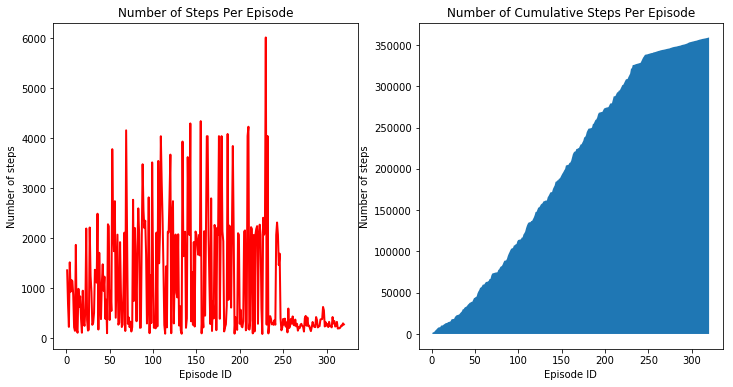

In [13]:
# plots of number of steps and number of cumulative steps per episode
x = list(range(1, num_episodes + 1))

fig = plt.figure(figsize = (12, 6))
fig.subplots_adjust(hspace = 6)

fig.add_subplot(1, 2, 1)
plt.plot(x, num_steps, color = "r", linewidth = 2)
plt.xlabel("Episode ID")
plt.ylabel("Number of steps")
plt.title("Number of Steps Per Episode")

fig.add_subplot(1, 2, 2)
plt.fill_between(x, np.cumsum(num_steps))
plt.xlabel("Episode ID")
plt.ylabel("Number of steps")
plt.title("Number of Cumulative Steps Per Episode")
plt.show()

In [14]:
# rolling average
s = pd.Series(rewards, index = range(1, 1 + num_episodes))
roll = s.rolling(window = 10).mean()

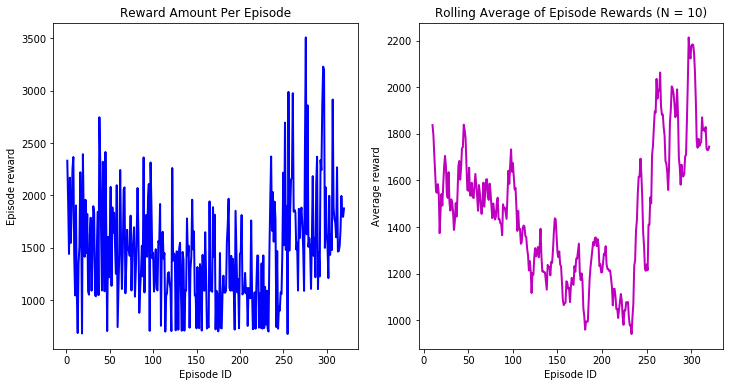

In [15]:
# plots of rewards and rolling average of rewards (window = 3) per episode
fig = plt.figure(figsize = (12, 6))
fig.subplots_adjust(hspace = 6)

fig.add_subplot(1, 2, 1)
plt.plot(x, rewards, color = "b", linewidth = 2)
plt.xlabel("Episode ID")
plt.ylabel("Episode reward")
plt.title("Reward Amount Per Episode")

fig.add_subplot(1, 2, 2)
plt.plot(x, list(roll), color = "m", linewidth = 2)
plt.xlabel("Episode ID")
plt.ylabel("Average reward")
plt.title("Rolling Average of Episode Rewards (N = 10)")
plt.show()

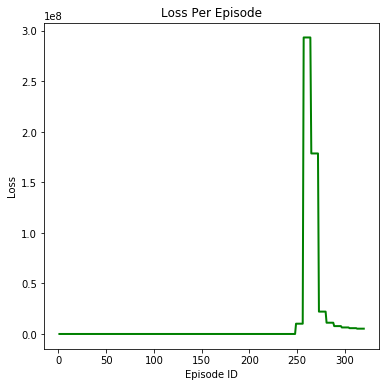

In [20]:
# plot of losses per episode
fig = plt.figure(figsize = (6, 6))
fig.add_subplot(1, 1, 1)
plt.plot(x, mean_losses, color = "g", linewidth = 2)
plt.xlabel("Episode ID")
plt.ylabel("Loss")
plt.title("Loss Per Episode")
plt.show()

[152.10345, 24.115452, 18.627913, 16.823278, 10.452521, 10.638659, 10.552846, 7.56521]
[0, 152.10345, 24.115452, 18.627913, 16.823278, 10.452521, 10.638659, 10.552846, 7.56521]


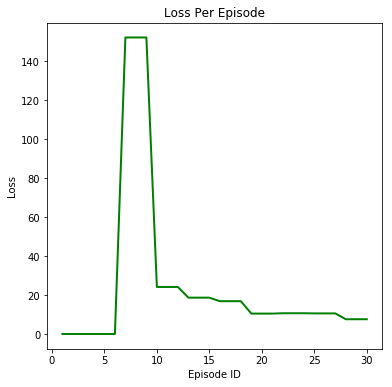

In [62]:
# YOU DON'T NEED TO RUN THIS CODE, I JUST INCLUDED IT FOR POSTERITY REASONS
# rolling mean losses for first trial, because I ran that trial before I saved the mean losses to a vector
roll_loss = []
for i in range(1, 9):
    roll_loss.append(np.mean(losses[:20*i+1][-(print_every * num_epochs):]))
print(roll_loss)
roll_loss = [0] + roll_loss
print(roll_loss)
roll_loss = np.repeat(roll_loss, np.insert(np.repeat(3, len(roll_loss) - 1), 0, 6))

fig = plt.figure(figsize = (6, 6))
fig.add_subplot(1, 1, 1)
plt.plot(x, roll_loss, color = "g", linewidth = 2)
plt.xlabel("Episode ID")
plt.ylabel("Loss")
plt.title("Rolling Mean Losses Per Episode")
plt.show()

## Results Summary

### Training Period 1 (Initial Run): Early Failure

I previously mentioned the parameters I used in my first training run. Here are the plots for the (cumulative) number of steps per episode:

![x](https://i.imgur.com/Wzt3ldY.png)

As we can see, number of steps vary wildly between just a few hundred to over $2000$ with very little in-between. This seems to suggest that Mario is either dying early to one of the Goombas at the beginning of the level or is making it up to a certain area before getting stuck (like the [pipes](https://i.imgur.com/J4SHXL6.png) near the beginning of the level). If you recall from the beginning of the report (or ran the random action demo at the beginning of the project), completely random Mario had a tendency to get stuck there and will only occasionally succeed in jumping over the pipes. This seems to suggest our more intelligent Mario did not sufficiently learn well enough how to clear the pipes in $30$ episodes. But what about the few episodes where it ran for $4000$ steps? Well, we can look at the plots for the (rolling average of) reward(s) per episode to get more information:

![x](https://i.imgur.com/iG8ORiK.png)

The pre-trained, completely random episodes seem to establish a reward baseline of about $1700$, but the trained episodes afterward never seem to reach that threshold and, in fact, get increasingly stuck as the episodes go on. This can be attributed to the fact that $\epsilon$ is decaying and so Mario is exploring less and less with each episode. Evidently, Mario is not learning much, and this is further enforced by the plot of losses per episode:

![x](https://i.imgur.com/xUduZQZ.png)

(The losses in the first $6$ episodes, which comprise the set of pre-training episodes and the episodes that run before the first training weight update, are zero because the network has not yet run training on batches taken from the global experience replay buffer.) This is a very severe loss curve which plateaus at a low loss value quickly, which most certainly corroborates the idea that Mario is not learning.

Therefore, as a result of all this, it would seem reasonable to suggest that running this network for more than the relatively paltry number of $30$ episodes is not likely to be beneficial and we would be better off changing the parameters around and starting over. Luckily, the design of our code makes this easy; we can simply remove the `.h5` weight files from the `.\models` folder, tweak the parameters we need, and simply run the code again. If we actually had a successful run, adding additional training is even easier; we don't have to change anything at all (except maybe the number of episodes to train on), we just need to re-run the training portion of the code because it will always check for model weights before it starts to do any training.

### Training Period 2: Increasing Initial $\epsilon$ and Optimizer Learning Rate

Since the random runs seem to at least get past the first row of pipes better than the trained runs in TP1 (Training Period 1), it may benefit Mario to try to be a little more random in the early stages. It's also possible that the learning rate for the Adam optimizer is just too low (that could contribute to the relatively pathetic loss curve above), so I bumped it up to `0.05` from `0.0001` (that's the learning rate that Blagojevic's tutorial used; he didn't give any justification as to why he used that value). I also added an extra pre-training episode, added a few more episodes to the total count, and adjusted the update frequency accordingly. The final parameters used are below; all parameters enclosed in asterisks were changed with the value in parentheses representing the value it previously had.

```
*self.model.optimizer.lr = 0.05* (0.0001)

batch_size = 64
num_epochs = 20
*update_freq = 4* (3)
y = 0.99
*prob_random_start = 0.9* (0.6)
prob_random_end = 0.1
*epsilon_steps = 32* (27)
*num_episodes = 36* (30)
*pre_train_episodes = 4* (3)
max_num_step = 50000
print_every = 1
save_every = 1
```

Remember that the model optimizer learning rate value can be found in the code block where we created `CNN_DQNAgent()`. In any case, here are the relevant plots for this model:

![x](https://i.imgur.com/sxRxe8P.png)
![x](https://i.imgur.com/E6FA15H.png)
![x](https://i.imgur.com/z5HwI9s.png)

The steps seem to be a bit longer on average compared to TP1, but nothing else looks promising. There was an episode - Episode 10, in particular - where Mario was able to score a reward higher than any of the pre-training runs, but that was the only time that happened. The strangest part is that the losses returned were `NaN`'s past Episode 8, which suggests that something about this combination of parameters causes problems. Perhaps the learning rate for the Adam optimizer is too high, leading to some weird exploding or vanishing gradient problem? I'm not really sure.

### Training Period 3: Decreasing Learning Rate Slightly

For this run, all I did was lower the learning rate down to `0.01`. The learning rate definitely seems to be the culprit of the loss issues, because while I did get `NaN`'s again, I also got this:

![x](https://i.imgur.com/fN1Ah38.png)

I also noticed some rather odd behaviors as the training episodes progressed. At first, it seems like it was learning at a solid rate, and it even managed to encounter a Koopa (a turtle-esque enemy common in the *Mario* franchise)!

![x](https://i.imgur.com/TRa2ZaE.gif)

But then, it updated the weights for the first time, proceeding into a phase that I am calling "**dancing Mario**". Mario would be constantly jumping back and forth, almost as if he was wildly confused, which is peculiar because there is no **left+A** movement option in the `SIMPLE_MOVEMENT` action library, which means Mario must be rapidly pressing `left` and `A` on separate but consecutive frames.

![x](https://i.imgur.com/8FgTNZr.gif)

(I know Mario kind of looks like he's floating around in this gif, but that's because the software that I used to capture the video of Mario's run off my screen drops a lot of frames.) After another update of the training weights, the losses returned to `NaN` and I was welcomed by a familiar performance:

![x](https://i.imgur.com/Hl5GuzO.gif)

The reward only continued to slide from here. Despite a bit of a dramatic episode, Mario failed to retain the knowledge he had obtained in the beginning.

Here are the plots:

![x](https://i.imgur.com/vAYbZi5.png)
![x](https://i.imgur.com/xT6yatd.png)
![x](https://i.imgur.com/c83Hi09.png)

All of these plots corroborate the above observations. There is definitely a spike of learning early on, but this dissipates quickly. Getting the right learning rate will therefore be of utmost importance.


### Training Period 4: Explorer Mario (learning rate = `0.001` and higher $\epsilon$ floor)

We will now do a training run of the same length but with a learning rate brought down to ten times its original value (`0.001`) rather than a hundred times (`0.01`) as it was before. It also occurred to me that what really might be helping Mario in his first set of training runs before the weights get updated is that he is still allowed to be experimental early; it could be that $\epsilon$ is decreasing too fast. Therefore, we are raising the floor of $\epsilon$, stored in `prob_random_end`, to `0.5`, and we will be also extending the length of the training period a bit longer. Here are the parameters we are using:

```
*self.model.optimizer.lr = 0.001* (0.0001)

batch_size = 64
num_epochs = 20
update_freq = 4
y = 0.99
prob_random_start = 0.9
*prob_random_end = 0.5* (0.1)
*epsilon_steps = 36* (32)
*num_episodes = 40* (36)
*pre_train_episodes = 4* (3)
max_num_step = 50000
print_every = 1
save_every = 1
```

And here are the plots:

![x](https://i.imgur.com/VaVdUkN.png)
![x](https://i.imgur.com/qcFM6gJ.png)
![x](https://i.imgur.com/TH6q5fA.png)

It appears at first that Mario is truly learning, and there are many episodes near the beginning that surpass the random pre-training performances. However, as Mario continues to update his training weights, his reward sinks quickly as he seems more and more determined to want to go left instead of right (or revert to "dancing Mario", in which he seems conflicted in which direction to travel). I'm still not sure why he's pursuing this behavior, but it perhaps indicates the need for another test; since Mario clearly is able to score higher with higher $\epsilon$, at least for a little while, Mario clearly needs to run for a much longer amount of time. This will also allow us to decay $\epsilon$ even slower than we have been, allowing Mario to reap the full benefits of his training for longer.

### Training Period 5: Explorer Mario Part 2

After each training period, I have been removing the saved weights from the `.\models` directory, essentially wiping Mario's memory. This time, I am going to ***keep the weights*** from TP4 and continue training where they left off. I will also be decreasing the learning rate once again to `0.0005`, five times its original value and half of what it was before, as well as sharply increasing the number of episodes to train on (as well as associated parameters). Here's what I'll be using:

```
*self.model.optimizer.lr = 0.0005* (0.001)

batch_size = 64
num_epochs = 20
update_freq = 4
y = 0.99
prob_random_start = 0.9
*prob_random_end = 0.3* (0.5)
*epsilon_steps = 290* (36)
*num_episodes = 300* (40)
*pre_train_episodes = 10* (4)
max_num_step = 50000
print_every = 1
*save_every = 10* (1)
```

Running for between $30$ and $40$ episodes took around an hour, so running for $300$ episodes (remember: that's a whopping $900$ lives!) should take at least ten hours; because it's saving every $4$ episodes and will thus save $72$ times, I would actually estimate the total run time at being closer to eleven or twelve hours. The hope is that Mario will be able to correct himself because of the much greater time spent acting randomly, although we could very easily end up with twelve hours of "dancing Mario". I left this code running overnight; the code seemed to run a lot faster than expected (which is good but also maybe suspicious), completing about a third of the episodes in an hour and a half, which likely means the entire code finished at around half the time I thought it would (maybe five hours or so). Again, this is sort of suspicious because it could mean Mario just wasn't learning much by the end, and as we will see, the plots will corroborate this claim. Nevertheless, Mario made quite the trek, taking well over $1.2\mathrm{M}$ steps!

![x](https://i.imgur.com/KncHdw9.png)

However, the plots don't tell a pretty story:

![x](https://i.imgur.com/oLGEItm.png)
![x](https://i.imgur.com/PEXWZbl.png)
![x](https://i.imgur.com/qGSj8Ao.png)

For the loss plot, I removed the losses from the initial training runs after the pre-training episodes because they were huge and were greatly distorting the plot, as one can see here:

![x](https://i.imgur.com/zNniyOk.png)

Mario does sustain a stronger average reward over time in the beginning, but before even a third of the episodes have completed, it has already started to decline. About halfway through, Mario's average reward dips below zero and never recovers. One thing is certain, then: running Mario on this architecture for a long time does not rectify his behavior. Even with $\epsilon$ values at around `0.6`, Mario seems to lose quite a bit of steam, having reward values that often dip below $1000$. The fact that Mario's reward eventually falls into the deep negative numbers suggests that ***Mario is learning to persistently move left***. The reward function, though, which I did not manually write and is taken as an output from `env.step()` (so I know there couldn't be problems there as it is outputting the correct reward), is definitely telling Mario that his reward is sinking for his actions, yet as $\epsilon$ falls, he is only ever more persistent in traveling left. This at least suggests he is learning *something*, because his performance is definitely not identical to random performances, but it does sadly mean that he is learning how *not* to play the game. I figure there are three potential causes for this:

1. The action space just needs to be smaller. Perhaps Mario shouldn't be allowed to go left, in which case we can use the `RIGHT_ONLY` action library.
2. The architecture is fundamentally problematic and needs to be changed. This seems to be corroborated by our very steep loss functions. The learning rate might also still be too high.
3. Interestingly, if we take a screenshot of GIF of Mario's performance, one can see that the image dimensions are `256 x 240`. However, the shape of the observation space of the environment itself is actually `(240, 256, 3)`, which could mean that the observation space is a rotation of the true image we want to study on. This could be problematic as it could cause Mario to get disoriented during training (i.e. it might think moving left moves Mario's position to the right), but I have my doubts that this is the case for a few reasons. Firstly, with these dimensions, the observation space would be a *rotation* of the true images, not a *reflection*, which means Mario, and everything else on screen, would appear to be moving up or down, not left or right. Secondly, the reward function does seem to measure Mario's reward accurately, which means the algorithm seems to have an understanding that Mario is making a concerted effort to go left and is losing reward because of this, yet it is not correcting this behavior even after a lot of training sessions with high initial $\epsilon$ that decays slowly.

### Training Period 6: `RIGHT_ONLY` Mario

`RIGHT_ONLY` removes Mario's ability to move left and jump in place, which means Mario can do only five things: `idle`, `right`, `right+A`, `right+B`, and `right+A+B`. This could solve the problem in the short-term, but I have my doubts that Mario will somehow magically become amazing at the game in the long-term because Mario loses the ability to go left to correct his position if he needs to, say, taking a running start and acquire more horizontal momentum before jumping. In particular, this is an aspect that will be important for clearing the row of pipes at the beginning of World 1-1, so I have my doubts that Mario will be able to sustain training performances higher than random action for very long, and will instead plateau (but not decrease into the negatives, surely). On the other hand, if $\epsilon$ remains high enough, Mario will be forced to explore running and jumping right more often than he did before, in which case he could discover that maintaining high rightward momentum at all times is generally very helpful, especially in the beginning of World 1-1. If this does work though, I have my doubts that Mario will be able to use these techniques to beat the whole game as even human players cannot be that careless with their own rightward momentum. Such is the difficulty of reinforcement learning, however, and is the nature of how narrow neural networks are in their performance scope.

In any case, all I have changed here is the action library (`SIMPLE_MOVEMENT` to `RIGHT_ONLY`) and I have decreased the learning rate back down to what it was for TP1 (`0.0001`). This will be another long $300$-episode run, so I expect the code to take several hours to complete. This is what the code changes look like as far as the creation of `main_qn` and `target_qn` (remember: we also need to import a new action library before we use it!) as well as a summary of the number of parameters. The dense Advantage layer `final_advantage` has a smaller shape now, meaning we save on a few hundred parameters.

![x](https://i.imgur.com/fzhliyM.png)

The only parts of the actual training code that need to change are in the beginning of the code blocks here:

![x](https://i.imgur.com/ZQXOUOL.png)

And now, the plots:

![x](https://i.imgur.com/LHVP2U2.png)
![x](https://i.imgur.com/X88RHoR.png)
![x](https://i.imgur.com/Uz5b97y.png)

There's some intrigue here, although we are still seeing the reward totals decline per episode. Interestingly, the number of steps per episode rarely exceed $2000$, which perhaps indicates that Mario dies more often in these runs and does not allow himself to time out as often as before. The loss curve is also rather curious; it decreases at about the same rate as before, and in fact decreases much more gracefully than before, but then goes back up towards the end. This could potentially indicate that the learning rate is still too high, or that there are diminishing returns on training for this length of time.


### Training Period 7: Increasing Batch Size

There is one last trick I'd like to try before I am forced to admit that the network requires fundamental changes to its architecture: changing the batch size. The batch size controls how many samples are taken at a time from the replay buffer to train on; it could be that increasing this batch size not only trains Mario faster (in terms of episodes; this is probably at the expense of computation time in general), but also trains him more effectively as it is more likely that steps or frames that teach Mario to get over certain obstacles (more "productive" frames) are selected from the replay buffer and used for updating the training weights. As such, we are going to increase that from `64` to `256` and additionally change a handful of other parameters. Here are the final parameters we will be using.

```
*self.model.optimizer.lr = 0.0001* (0.0005)

*batch_size = 256* (64)
num_epochs = 20
*update_freq = 8* (4)
y = 0.99
prob_random_start = 0.9
prob_random_end = 0.3
*epsilon_steps = 312* (290)
*num_episodes = 320* (300)
*pre_train_episodes = 8* (10)
max_num_step = 50000
print_every = 1
*save_every = 8* (10)
```

Now, if we look at the step and reward plots...

![x](https://i.imgur.com/eHxbypj.png)
![x](https://i.imgur.com/BlUFUvf.png)

...We finally see something promising! For the first time, during the low-$\epsilon$ episodes at the end of the training run, Mario was able to reach a reward of over $3000$ (to be precise, a reward of $3506$ during episode $276$, `epsilon = 0.3865`)! This had never previously happened in *any* earlier training run, including pre-training episodes, and while Mario was not able to get to this reward consistently, he was able to at least exceed $3000$ multiple times! Moreover, if we look at the reward curve, we see that Mario does slowly lose reward in the beginning and middle of the training run as in previous runs (at a rate similar to TP1 and TP6), but then it suddenly shoots back up at around the same time Mario begins shortening his episodes. For a brief period, his rolling mean reward is *consistently higher* than the pre-training episodes before falling back down to roughly equal to the pre-training level at the very end of the training run.

The steps per episode plot is also kind of interesting. Like in TP6, Mario had a better sense of keeping his runs relatively short, and this reaches a zenith near the end of the training run in which, after roughly episode $250$, Mario is able to keep his training runs so short that they hover around $500$ steps. Since this could mean Mario is repeatedly running into enemies to end his runs early, that's not necessarily a good sign, but given the surprising shape of the reward plot, it likely means Mario is actually advancing and not timing out while trying to jump over the pipes. His total steps taken during this last run don't even exceed $400000$:

![x](https://i.imgur.com/EPrLw3y.png)

This means his average steps per episode is $\frac{359327}{320} \approx 1123$. Now, if we look at the loss plot, we see a weird story...

![x](https://i.imgur.com/1688amM.png)
![x](https://i.imgur.com/GENjndA.png)

I took two pictures of the loss plot because the loss gets so great towards the end that it distorts the whole plot. The loss initially starts high and decreases quickly as in previous training runs (but most closely to TP1 and TP6 as the loss starts in the hundreds before quickly sinking to low double digits or even single digits), but then suddenly shoots into $10^8$ territory towards the end, at around the same time Mario greatly improves his reward and shortens his steps per episode. Sadly, the renderer glitched out for much of this run (which shouldn't affect training), so I couldn't get a good sense of what Mario was doing during these episodes, but it's quite possible he had learned to consistently traverse the dreaded Row of Pipes™ at the beginning of World 1-1.

After running Mario again for a couple more episodes in a new brief run, I was able to get this footage of Mario clearing the pipes with $\epsilon = 0.1$! This proves without a doubt that Mario had been learning (even if he does still struggle a little with the pipes) because he had never been able to clear the pipes with an $\epsilon$ this low before!

![x](https://i.imgur.com/pg7iF4T.gif)

## Conclusion

Getting Mario to beat World 1-1 with a CNN+DQN neural network is not going to be easy. I was not able to do it during the timeframe of this project, but I tried a lot of configurations and was eventually able to at least get Mario to fairly consistently match or beat his random pre-training performances. It appears that having a good enough batch size is key, followed by having an appropriate learning rate (`0.0001` may still be a little too high). I have ideas for further improvements, which you can read in `Final Report.ipynb`, as well as a discussion of why Mario seems to struggle on the Row of Pipes™ at the beginning of World 1-1. Thanks for following me through this difficult but satisfying journey of teaching an algorithm how to play *Super Mario Bros.*!